In [1]:
#suppress some warnings in jupyter
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# We will also try CatBoostClassifier
# pip install catboost

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [9]:
# view the categorical variables

df[categorical].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [10]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [11]:
# view frequency counts of values in categorical variables

for var in categorical:
    print(df[var].value_counts())

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [12]:
# view frequency distribution of categorical variables

for var in categorical:
    print(df[var].value_counts()/float(len(df)))

Loan_ID
LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
              ...   
LP001692    0.001629
LP001693    0.001629
LP001698    0.001629
LP001699    0.001629
LP002990    0.001629
Name: count, Length: 614, dtype: float64
Gender
Male      0.796417
Female    0.182410
Name: count, dtype: float64
Married
Yes    0.648208
No     0.346906
Name: count, dtype: float64
Dependents
0     0.561889
1     0.166124
2     0.164495
3+    0.083062
Name: count, dtype: float64
Education
Graduate        0.781759
Not Graduate    0.218241
Name: count, dtype: float64
Self_Employed
No     0.814332
Yes    0.133550
Name: count, dtype: float64
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: count, dtype: float64
Loan_Status
Y    0.687296
N    0.312704
Name: count, dtype: float64


In [13]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [14]:
# view the numerical variables

df[numerical].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [15]:
# check missing values in numerical variables

df[numerical].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

## __EDA__

c:\Users\abuttan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


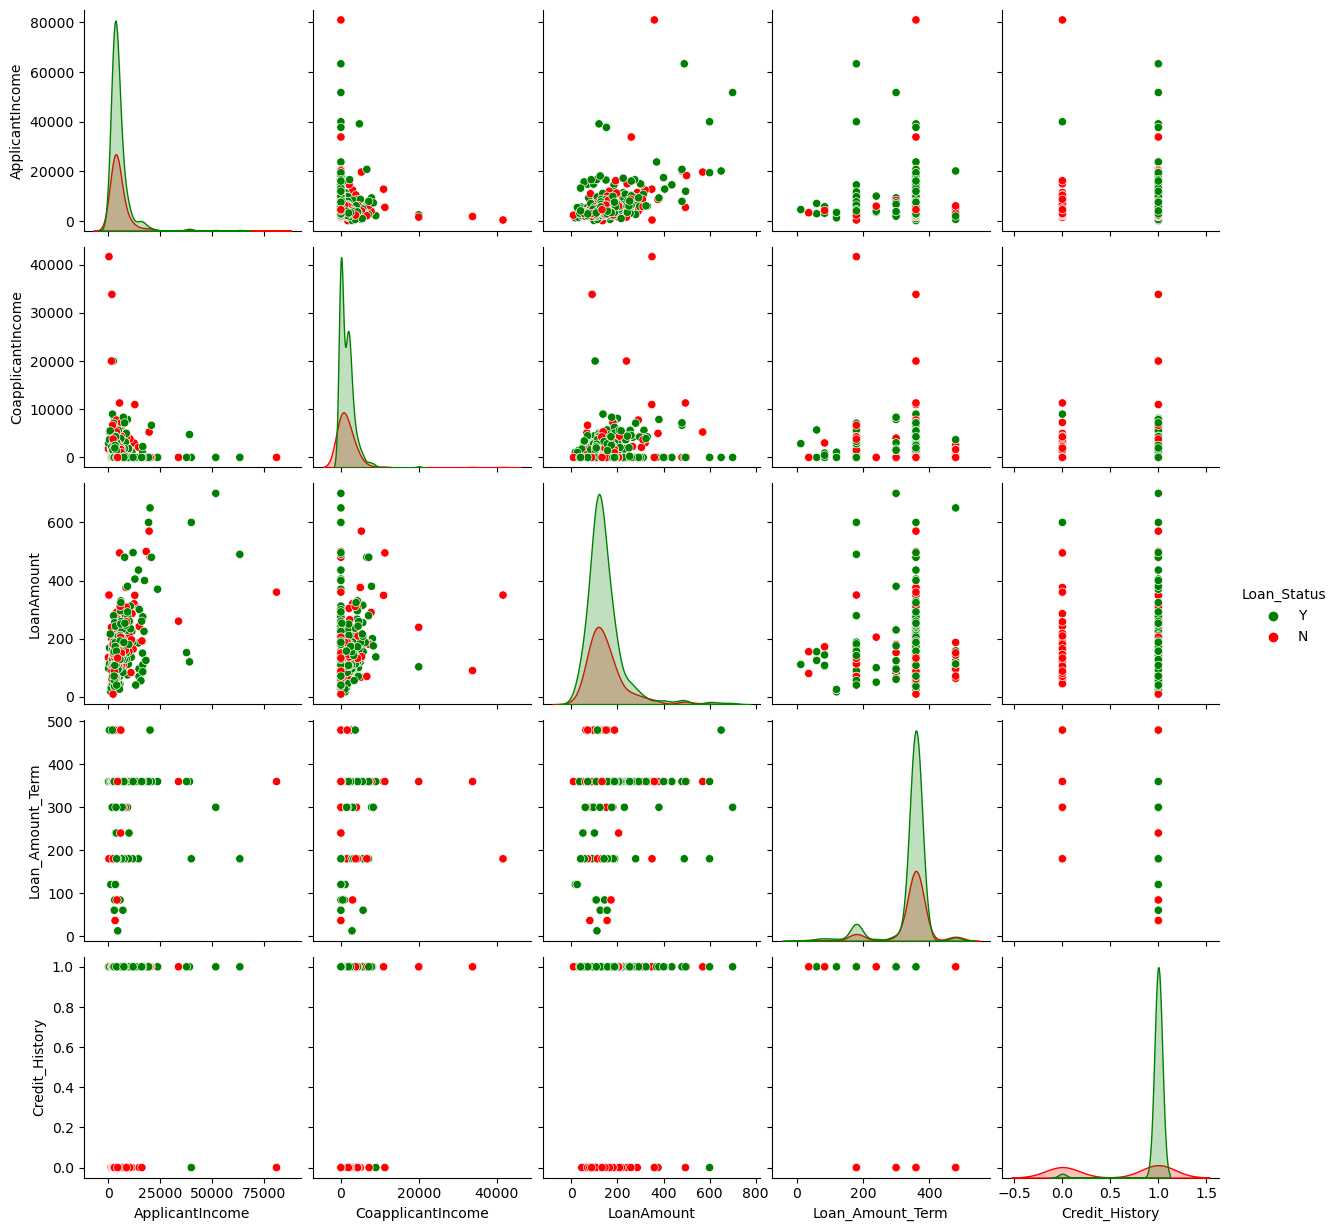

In [16]:
import seaborn as sns
sns.pairplot(df, hue="Loan_Status", palette={"Y": "green", "N": "red"})

### Plot observations:
1. From the above plots, it appears that `Credit_History` has a significant impact on loan approval status. There is quite clear separation of `Loan_Status` values `Y` and `N` for the credit history plot. This indicates that borrowers with credit score 1 may have higher chances of __loan acceptance__. Conversely, borrowers with credit score of 0 may have much higher chances of __loan rejection__. However, there are some rejections for applicants with good credit history which indicates there are other factors also involved when reviewing loan applications.
2. Both `ApplicantIncome` and `CoApplicantIncome` show right-skewed distributions. Most applicants and co-applicants have incomes below 20000. Some outliers with very high incomes (upto 80000). No clear separation between approved/rejected based on income alone. So, having a co-applicant doesn't improve chances of loan approval.
3. Most loan amounts are concentrated in the range 200-300. The `LoanAmount` distribution is right skewed. No strong visible correlation with loan approval status. Applicants with good credit history(1) may be issued higher loan amounts in some cases compared to applicants with bad credit history(0). Generally, the spread of loan amount for credit history 1 is fairly even. 
4. Loan Term doesn't show strong correlation with loan approval. It has discrete values with common terms around 350-400. 

As we have observed in the pair plots, the 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount' are features with continuous values and right skewed data, lets measure the skew as below. 

In [17]:
print(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew())


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64


All these 3 features show positive skew with the highest skew observed for `ApplicantIncome` and `CoapplicantIncome` columns.

Skewness before transformation:
TotalIncome         5.619677
LoanAmount               NaN
Loan_Amount_Term         NaN
dtype: float64

Skewness after transformation:
TotalIncome        -0.034551
LoanAmount               NaN
Loan_Amount_Term         NaN
dtype: float64


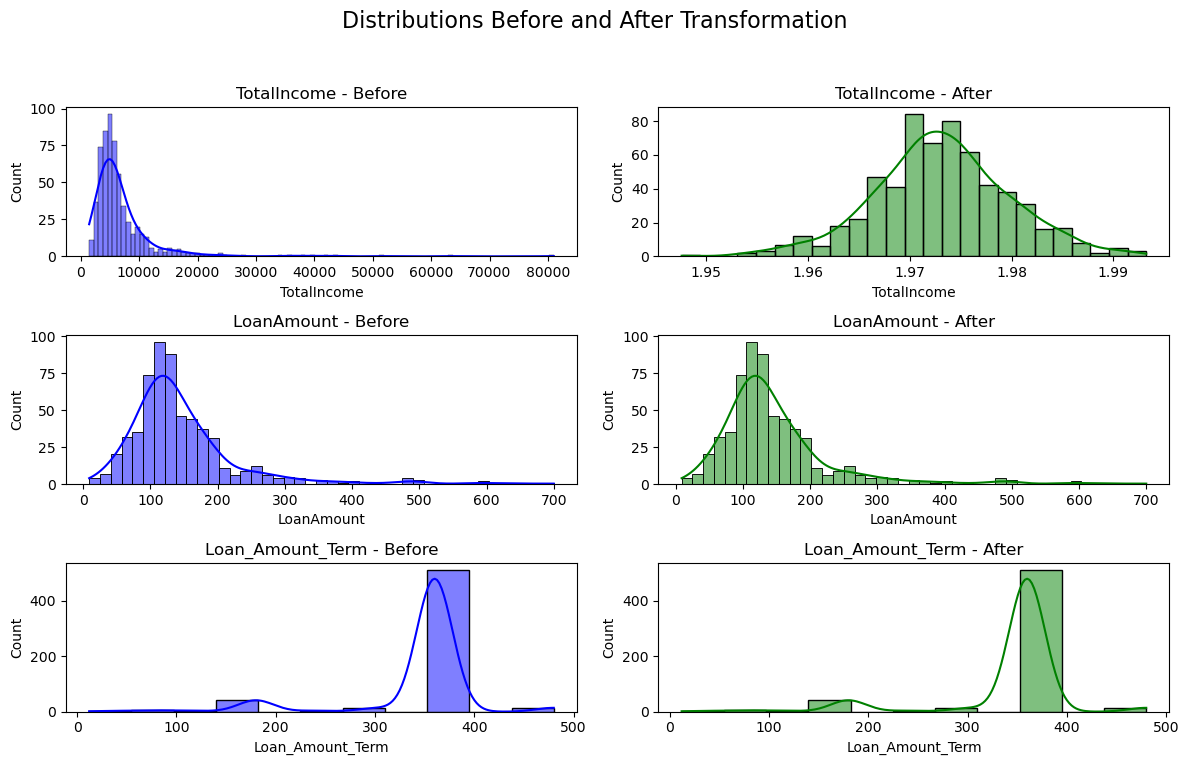

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, yeojohnson

# Sample data (replace with your numerical data)
data = df[['TotalIncome', 'LoanAmount', 'Loan_Amount_Term']]

# Compute skewness before transformation
skewness_before = data.apply(skew)
print("Skewness before transformation:")
print(skewness_before)

# Apply Yeo-Johnson transformation to numerical features
data_transformed = data.copy()
for col in data.columns:
    # Apply transformation only if skewness is significant
    if skew(data[col]) > 0.5 or skew(data[col]) < -0.5:
        data_transformed[col], _ = yeojohnson(data[col] + 1e-6)  # Small shift to avoid zeros in input

# Compute skewness after transformation
skewness_after = data_transformed.apply(skew)
print("\nSkewness after transformation:")
print(skewness_after)

# Plot histograms before and after transformation
fig, axes = plt.subplots(len(data.columns), 2, figsize=(12, 8))
fig.suptitle("Distributions Before and After Transformation", fontsize=16)

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i, 0], kde=True, color='blue')
    axes[i, 0].set_title(f"{col} - Before")
    sns.histplot(data_transformed[col], ax=axes[i, 1], kde=True, color='green')
    axes[i, 1].set_title(f"{col} - After")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
df["Loan_Amount_Term"].value_counts()
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].value_counts()


TotalIncome
6000.0     5
3750.0     4
4583.0     4
2500.0     4
8334.0     3
          ..
4923.0     1
5100.0     1
11000.0    1
6232.0     1
7583.0     1
Name: count, Length: 554, dtype: int64

             count    mean    std   min  <lambda_0>  median  <lambda_1>    max
Loan_Status                                                                   
N              181  151.22  85.86   9.0       100.0   129.0       176.0  570.0
Y              411  144.29  85.48  17.0       100.0   126.0       161.0  700.0


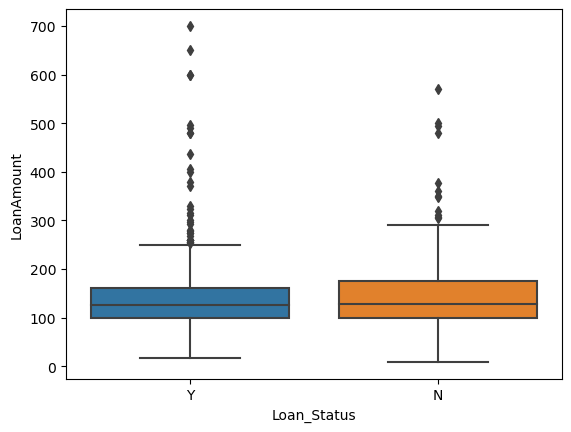

In [18]:
# LoanAmount vs Loan_Status
import seaborn as sns
summary = sns.boxplot(data=df, x='Loan_Status', y='LoanAmount').figure.get_figure()
summary_stats = df.groupby('Loan_Status')['LoanAmount'].agg([
    'count', 'mean', 'std', 'min',
    lambda x: x.quantile(0.25),
    'median',
    lambda x: x.quantile(0.75),
    'max'
]).round(2)
print(summary_stats)

### Plot observations:
1. Both box plots show similar median loan amount levels(around 120-130)
2. Loans that are approved have max loan amount of 700 units.
3. Clusters of outliers in the range 250-500 units for approved loans. Some clusters of outliers are observed around 300 units for rejected loans.
4. The whisker length and IQR is larger for rejected loans. This is also because the dataset is imbalanced(rejected loan data is more than approved)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

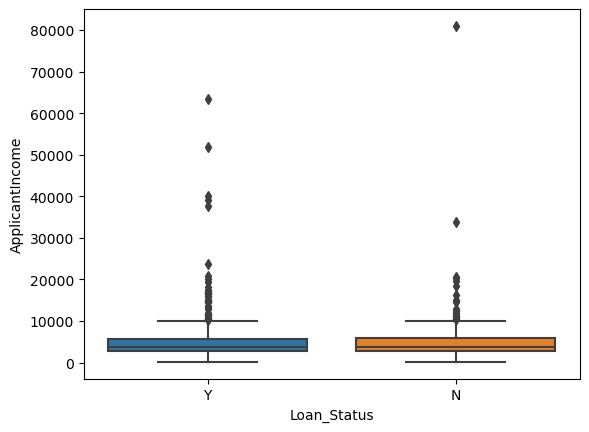

In [19]:
# ApplicantIncome vs Loan_Status
import matplotlib.pyplot as plt
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

### Plot observations:
1. Both box plots show similar median income levels (around 5,000-6,000)
2. Most applicants (both approved and rejected) have incomes clustered between roughly 0-20000. So most loans are taken by applicants in low income groups.
3. There are numerous outliers(especially for approved loans) extending up to 80000 in income.
4. The whisker length and boxes are similar in size. This suggests similar income variability among both approved and rejected loans.
5. Some very high income applicants(40000 to 80000) observed for both categories with the highest(80000) income for rejected loan.
6. Income alone does not appear to be a decisive factor in loan approval, as there is significant overlap in income distributions between approved and rejected applications.

<Axes: xlabel='Credit_History', ylabel='count'>

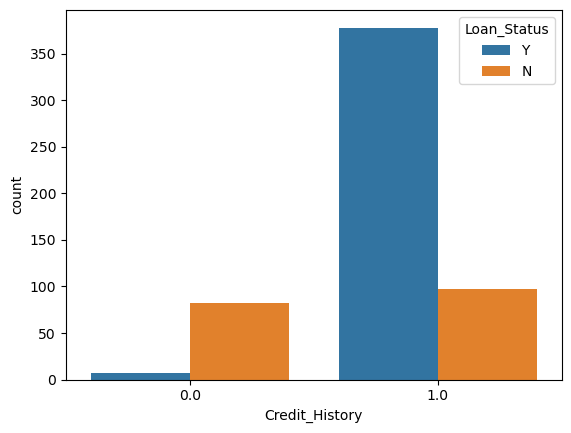

In [20]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

### Plot observations:
1. Credit history appears to have strong correlation with loan approval. So it is a strong predictor of loan approval status.
2. It is clearly evident from the above plot that applicants with good credit history(1) have higher chances of their loan application getting approved. 

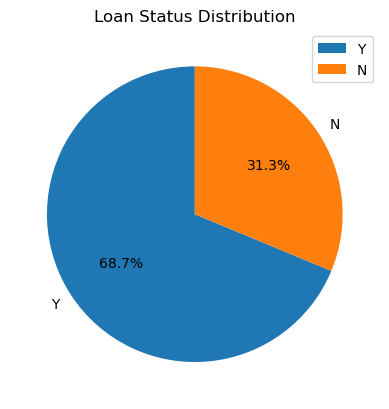

In [21]:
loan_status_counts = df["Loan_Status"].value_counts()

loan_status_counts.plot.pie(
    autopct='%1.1f%%',  
    startangle=90,      
    legend=True,        
    ylabel='',          
    title='Loan Status Distribution'
)

plt.show()

The above plot indicates that the data is imbalanced. A majority of the dataset has accepted applications(Y). We must perform data balancing techniques only on the training set before training the data.

## ML Pipeline

We will create an ML pipeline that will:
1. preprocess the training data - this involves three steps in order - imputation of missing values, boxcox transformation of positively skewed features and scaling numerical features to the same scale using StandardScaler. For categorical variables, we will do one-hot encoding of the features.
4. balancing the dataset using different oversampling/undersampling samplers(like SMOTE, ADASYN, NearMiss)
5. train models with different classifier models
6. perform grid search with cross-validation and recommend the best classifier model with best hyperparameters

In [ ]:
#imports
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import NearMiss, TomekLinks, RandomUnderSampler, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, cross_val_score
import numpy as np
from scipy.stats import boxcox, skew

In [23]:
#Boxcox transformation functions
def boxcox_transform(X):
    # Apply Box-Cox transformation only to features with positive values
    return np.array([boxcox(x)[0] if np.all(x > 0) else x for x in X.T]).T

def shift_data(X):
    # Check for negative or zero values and shift the data if necessary. Feature CoapplicantIncome has zero values
    min_value = X.min()
    if min_value <= 0:
        shift_amount = abs(min_value) + 1e-6  # A small constant to avoid zero values
        X = X + shift_amount
    return X

# Conditional transformation function
def conditional_transform(X, skew_threshold=0.5):
    transformed = []
    for col in range(X.shape[1]):
        col_data = X[:, col]
        skewness = skew(col_data)
        
        if skewness > skew_threshold:  # Positive skewness
            col_data = shift_data(col_data)  # Shift the data to ensure positivity
            col_data = boxcox_transform(col_data.reshape(-1, 1)).flatten()
        elif skewness < -skew_threshold:  # Negative skewness
            col_data = shift_data(-col_data)  # Shift negative values
            col_data = -boxcox_transform(col_data.reshape(-1, 1)).flatten()
        transformed.append(col_data)
    return np.array(transformed).T

In [ ]:
# Define the columns for different preprocessing steps
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = ['Credit_History', 'Gender','Loan_Amount_Term', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Create a preprocessor with different transformers for different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', ImbPipeline([
            ('imputer', SimpleImputer(strategy='mean')),  
            ('boxcox', FunctionTransformer(conditional_transform, validate=False)),  
            ('scaler', MinMaxScaler())
        ]), numerical_features),
        
        ('cat', ImbPipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_features)
    ]
)

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('category')
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]
X_columns = X.columns.tolist()
X = np.array(X) # array conversion needed for Stratified splitting
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = np.array(y_encoded) # array conversion needed for Stratified splitting
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Train-test split
for train_index, test_index in stratified_split.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]


# Combine the preprocessor and model into a pipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=0)),
    ('classifier', LogisticRegression())
])

# Classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVM': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0, random_state=0)
}


# samplers
samplers = {
    'SMOTE': SMOTE(random_state=0),
    'ADASYN': ADASYN(random_state=0),
    'RandomOverSampler': RandomOverSampler(random_state=0),
    'NearMiss': NearMiss(),
    'SMOTEENN': SMOTEENN(),
    'SMOTETomek': SMOTETomek(),
    'TomekLinks': TomekLinks(), 
    'RandomUnderSampler': RandomUnderSampler(), 
    'ClusterCentroids': ClusterCentroids()
}

param_grid = []

for clf_name, clf in classifiers.items():
    for sampler_name, sampler in samplers.items():
        grid_params = {
            'sampler': [sampler],
            'classifier': [clf],
        }

        # Handle specific sampler and classifier combinations
        if sampler_name == 'SMOTE':
            grid_params['sampler__k_neighbors'] = [3, 5, 7]  # SMOTE-specific parameter
        elif sampler_name == 'ADASYN':
            grid_params['sampler__n_neighbors'] = [3, 5, 7]  # ADASYN-specific parameter
        
        #classifier hyperparameters
        if clf_name == 'LogisticRegression':
            grid_params.update({
                'classifier__C': [0.1, 1, 10],
                'classifier__penalty': ['l1', 'l2'],
                'classifier__solver': ['liblinear', 'saga'],
                'classifier__class_weight': ['balanced']
            })
            grid_params.update({
                'classifier__C': [0.1, 1, 10],
                'classifier__penalty': ['elasticnet'],
                'classifier__l1_ratio': [0.5, 0.7, 0.9],
                'classifier__solver': ['saga'],
                'classifier__class_weight': ['balanced']
            })
        elif clf_name == 'SVM':
            grid_params.update({
                'classifier__C': [0.1, 1, 10],
                'classifier__gamma': [0.01, 0.1, 1],
                'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'classifier__degree': [2, 3, 4],
                'classifier__class_weight': [{0: 2, 1: 1}, {0: 1, 1: 1}, 'balanced']
            })
        elif clf_name == 'KNeighborsClassifier':
            grid_params.update({
                'classifier__n_neighbors': [3, 5, 7],  # Only for KNeighborsClassifier
            })
        elif clf_name == 'DecisionTreeClassifier':
            grid_params.update({
                'classifier__max_depth': [5, 10, None],
                'classifier__min_samples_split': [2, 5, 10],
            })
        elif clf_name == 'BaggingClassifier':
            grid_params.update({
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_samples': [0.5, 1.0],
            })
        elif clf_name == 'GradientBoostingClassifier':
            grid_params.update({
                'classifier__n_estimators': [50, 100],
                'classifier__learning_rate': [0.05, 0.1, 0.2],
            })
        elif clf_name == 'AdaBoostClassifier':
            grid_params.update({
                'classifier__n_estimators': [10, 50, 100, 200],
                'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5],
                'classifier__base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
            })
        elif clf_name == 'CatBoostClassifier':
            grid_params.update({
                'classifier__learning_rate': [0.01, 0.05, 0.1],
                'classifier__depth': [4, 6, 8],
            })

        param_grid.append(grid_params)



# Stratified K-Fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5,  shuffle=True)
        
# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, scoring='f1', verbose=10, n_jobs=-1)
X_train = pd.DataFrame(X_train, columns=X_columns)
X_test = pd.DataFrame(X_test, columns=X_columns)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)


# Train the model
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best classifier parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 5174 candidates, totalling 25870 fits
Best classifier parameters: {'classifier': LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga'), 'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.9, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'sampler': RandomUnderSampler()}
Best score: 0.8758128985147821


The model with best performance as recommended by grid search is LogisticRegression. The hyperparameters of the different classifiers were continuosly fine tuned to get this result.

In [33]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report (Test Set)")
print(classification_report(y_test, y_test_pred))

cv_scores = cross_val_score(best_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")

Best Parameters: {'classifier': LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga'), 'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.9, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'sampler': RandomUnderSampler()}
Classification Report (Test Set)
              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

CV Scores: [0.81818182 0.39795918 0.75510204 0.80612245 0.8877551 ]
Mean accuracy: 0.7330241187384046


### Model Performance on Test set
We make the following observations from the above classification report and CV scores on test set:
1. Class Imbalance Impact:

- The model performs significantly better on class 1 (positive class) compared to class 0 (negative class).
- This could be due to class imbalance, as the number of samples for class 1 (85) is much higher than for class 0 (38). - The model might be biased toward class 1.

2. Strengths:

- The model has excellent recall (0.99) for class 1, meaning it almost always identifies positive samples correctly.
- High precision for class 0 (0.79) suggests that when the model predicts the negative class, it is usually correct.

3. Weaknesses:

- The low recall for class 0 (0.42) indicates that the model misses many actual negative samples, misclassifying them as positive.
- This weakness could be problematic in scenarios where identifying class 0 is critical.

4. Consistency across folds:

- The CV scores show across folds are show less variation. This indicates that the model performs reasonably consistently across the folds, but there may be slight variations due to the data split.

5. Mean Accuracy:

- A mean accuracy of 0.73 means that, on average, the model correctly predicts the outcome for 73% of the data points it evaluates
- This indicates that the model has learned patterns in the data well enough to generalize to unseen examples most of the time. However, further investigation is needed to understand whether the model has indeed generalised well enough.

In [34]:
y_train_pred = best_model.predict(X_train)
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.92      0.43      0.58       154
           1       0.79      0.98      0.88       337

    accuracy                           0.81       491
   macro avg       0.85      0.71      0.73       491
weighted avg       0.83      0.81      0.78       491



### Model Performance on Training set

We make the following observations from the above classification report on training set:
1. Class Imbalance Handling:

- The model is biased toward Class 1, which has a higher recall and F1-score. This might be because Class 1 has more instances in the training set.
- Class 0 is not being effectively captured, as evidenced by its low recall and F1-score.

2. Potential Overfitting to Class 1:

- The high precision and recall for Class 1 might indicate that the model is "memorizing" patterns for the majority class, rather than generalizing across both classes. 

3. Strengths:

- High Precision for Class 0 (0.92): The model does a good job of correctly identifying instances of Class 0 when it predicts them. This means that when the model predicts the negative class (Class 0), it is highly reliable (low false positives).
- Very High Recall for Class 1 (0.98): The model is highly sensitive to Class 1, correctly identifying 98% of all Class 1 instances. This means the model is excellent at detecting the positive class and rarely misses any true positive instances (very few false negatives).
- Reasonable Overall Accuracy (0.81): The model achieves 81% accuracy, which indicates that, overall, it performs reasonably well across both classes, even though performance for Class 0 is not as strong.
- Balanced Precision for Class 1 (0.79): The model achieves decent precision for Class 1 (79%), which means that among all predictions of Class 1, most are correct. The precision is not as high as for Class 0 but still quite good for a classification task with imbalanced classes.

4. Weaknesses:

- Poor recall for Class 0, imbalanced performance between classes, and low F1-score for Class 0.

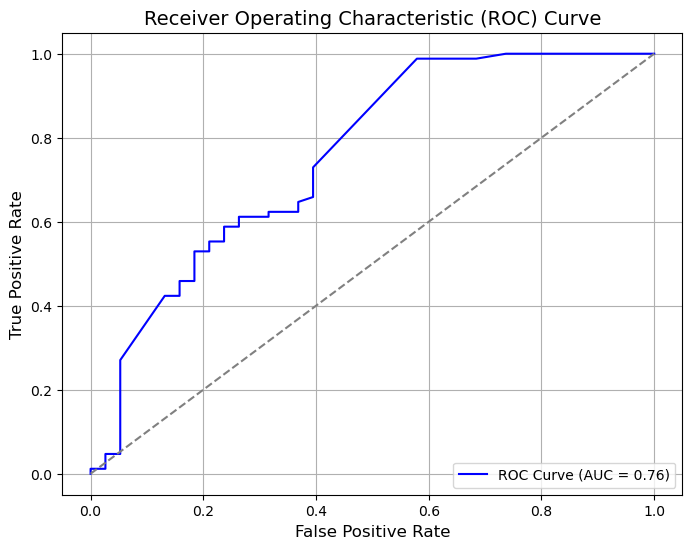

In [35]:

from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, f1_score

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()


The AUC-ROC score of 0.76 suggests that the model has a reasonably good ability to separate the two classes (Class 0 and Class 1). 

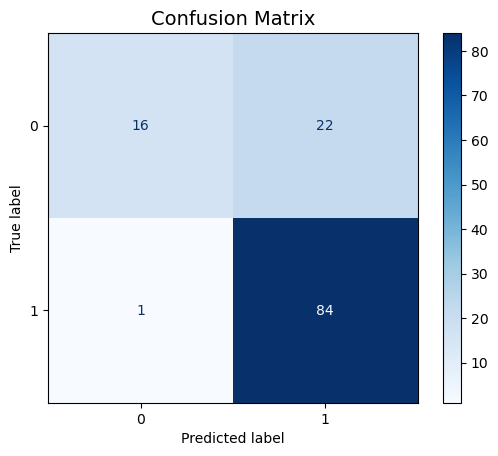

In [36]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues", values_format="d")  # Customize colormap and format

plt.title("Confusion Matrix", fontsize=14)
plt.grid(False)  # Disable grid for cleaner visualization
plt.show()


Class 0 Misclassifications (False Negatives): 16 instances of class 0 were predicted as 1.
Class 1 Misclassifications (False Positives): Only 1 instance of class 1 were predicted as 0.
This suggests the model is strongly biased towards classifying 1 correctly at the cost of misclassifying 0.

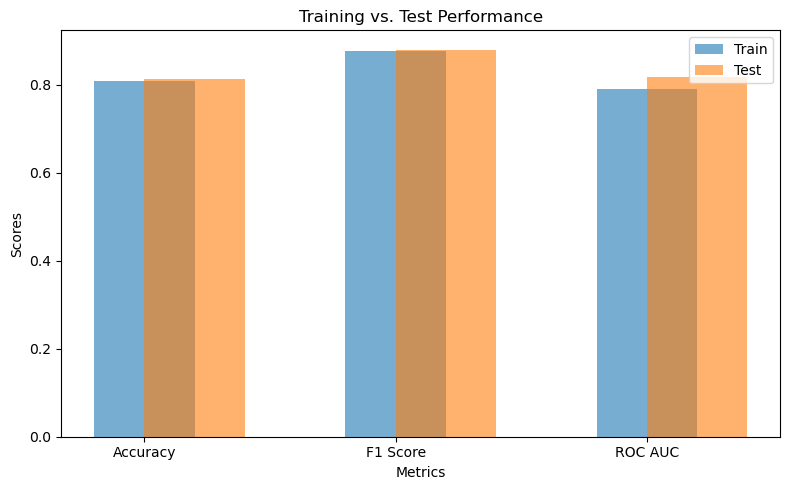

In [37]:
pipeline.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

# Prepare data for plotting
metrics = ['Accuracy', 'F1 Score', 'ROC AUC']
train_scores = [train_accuracy, train_f1, train_auc]
test_scores = [test_accuracy, test_f1, test_auc]

# Plot the comparison between training and test performance
x = range(len(metrics))

plt.figure(figsize=(8, 5))

# Bar plot for training and test performance
plt.bar(x, train_scores, width=0.4, label='Train', align='center', alpha=0.6)
plt.bar(x, test_scores, width=0.4, label='Test', align='edge', alpha=0.6)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Training vs. Test Performance')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()

The above plot shows that the training and test sets perform nearly similarly which indicates the model has generalized well

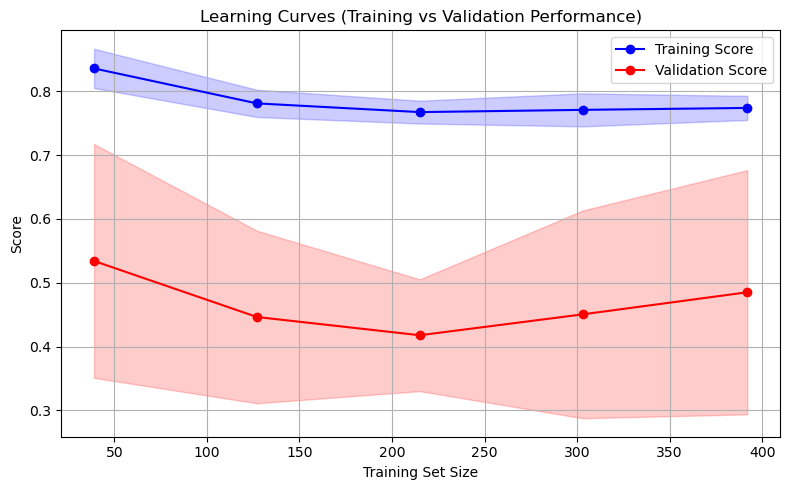

In [38]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(pipeline, X_train, y_train, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Score", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curves (Training vs Validation Performance)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The above learning curves indicate that the training curve and validation curve become almost parallel as the training set size increases. This means that both scores are improving together and the model has generlized well and is not overfitting. 

In [39]:
num_transformer = preprocessor.named_transformers_['num']
X_transformed = num_transformer.transform(df[numerical_features])
transformed_skewness = pd.DataFrame(X_transformed).skew()
print("Skewness before transformation:\n", df[numerical_features].skew())
print("Transformed skewness:\n", transformed_skewness)

Skewness before transformation:
 ApplicantIncome      6.539513
CoapplicantIncome    7.491531
Loan_Amount_Term    -2.362414
LoanAmount           2.677552
dtype: float64
Transformed skewness:
 0   -0.092513
1   -0.211076
2    0.052182
3    0.030141
dtype: float64


The above result shows skewness of numerical features before and after transformation(for the numeric features). This confirms that the features were successfully transformed for training.

## Conclusion

The primary goal of credit risk analysis in loan disbursement is to minimize default rates while maximizing profitability. Traditionally, the process of loan approval has been quite manual wherein each application is carefully evaluated based on credit history, income, age etc. of the applicant. A borrower with a high credit score and stable income is more likely to receive loan approval based on the credit risk analysis. However, now using machine learning techniques, it is possible to significantly reduce manual work in evaluating loan applications. Moreover, manual investigation is time-consuming and error-prone. 

In this project, an attempt is made to train a machine learning model on a dataset consisting of different attributes of typical loan applications such as credit history, income etc. of the applicants and predict whether a new loan application should be accepted or rejected. 

The dataset has over 600 records and is analyzed to understand any correlation between the target variable LoanStatus and other variables or features in the dataset. For instance, we observe that most loan applications are from low income groups and most applications that are approved have a good credit score. 

Other observations such as skewness of features, missing values and general distribution of values across the dataset helped in making further decisions in the exploratory analysis. For instance, a positive skewness was observed for some numerical features such as ApplicantIncome. This information helped in ensuring that such features are transformed using techniques such as Boxcox transformations before being fed into the machine learning pipeline. Similarly, for the features where values are missing, imputation is performed as part the preprocessing step in the pipeline.

The machine learing pipeline consists of preprocessing steps such as feature transformations, imputation, data scaling, and encoding. It is also observed that the dataset is imbalanced because there were significantly more samples for approved loan applications(LoanStatus = Y) than rejected ones(LoanStatus = N). Therefore, several sampling techniques like SMOTE, ADASYN etc. were evaluated to ensure the dataset is balanced well for training.

The pipeline also trained and evaluated multiple classifier algorithms - Logistic Regression, KNN Classifier, Support Vector Machines, Decision Tree Classifier, Bagging Classifier, Gradient Boosting Classifier, AdaBoost Classifier and CatBoost Classifier. Each classifier was intially defined with default hyperparameters and the model was trained. To optimize the model performance, these hyperparameters were fine tuned to get the best performance.

Using GridSearch cross-validation technique, the best performing model and hyperparameters were identified as below:

`{'classifier': LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.9, max_iter=1000,
                   penalty='elasticnet', solver='saga'), 'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__l1_ratio': 0.9, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga', 'sampler': RandomUnderSampler()}`
                   
The model trained on __LogisticRegression__ was chosen as the best performing classifier in the GridSearch cross validation. It has demonstrated a mean accuracy of __73%__(test set) across k folds(deduced through stratification) which means that the model has learned patterns in the data well enough to generalize to unseen examples most of the time. The accuracy as per classification report is also high(81%). However, the f1-score and recall were biased towards class 1(LoanStatus = Y) because the dataset has more samples for LoanStatus = Y. Despite using sampling techniques and class weights(for some classifier algorithms), this bias was observed in the results. It is likely that more samples will be needed to give better, more reliable results. 

The AUC-ROC score of 0.76 suggests that the model has a reasonably good ability to separate the two classes (Class 0 and Class 1). From the learning curve plots, it was observed that the model has generalized well and not overfitting. When comparing various metrics such as Accuracy, f1 score, AUC-ROC between training set and test set, the results were similar suggesting that the model is not underfitting or overfitting and has generalized well.